In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# HR_management data
"In this project, I'll visualize data to help readers gain clearer insights."  

In [2]:
df_hr = pd.read_csv('dateset/HR_Data.csv', header=0)  
df_hr.head()
# df_hr.dtypes 

Attrition    Business Travel CF_age band CF_attrition label Department  \
0       Yes      Travel_Rarely     35 - 44       Ex-Employees      Sales   
1        No  Travel_Frequently     45 - 54  Current Employees        R&D   
2       Yes      Travel_Rarely     35 - 44       Ex-Employees        R&D   
3        No  Travel_Frequently     25 - 34  Current Employees        R&D   
4        No      Travel_Rarely     25 - 34  Current Employees        R&D   

  Education Field   emp no  Employee Number  Gender               Job Role  \
0   Life Sciences  STAFF-1                1  Female        Sales Executive   
1   Life Sciences  STAFF-2                2    Male     Research Scientist   
2           Other  STAFF-4                4    Male  Laboratory Technician   
3   Life Sciences  STAFF-5                5  Female     Research Scientist   
4         Medical  STAFF-7                7    Male  Laboratory Technician   

   ... Performance Rating Relationship Satisfaction Standard Hours  \
0  ...                  3                         1             80   
1  ...                  4                         4             80   
2  ...                  3                         2             80   
3  ...                  3                         3             80   
4  ...                  3                         4             80   

   Stock Option Level  Total Working Years  Work Life Balance  \
0                   0                    8                  1   
1                   1                   10                  3   
2                   0                    7                  3   
3                   0                    8                  3   
4                   1                    6                  3   

   Years At Company  Years In Current Role  Years Since Last Promotion  \
0                 6                      4                           0   
1                10                      7                           1   
2                 0                      0                           0   
3                 8                      7                           3   
4                 2                      2                           2   

   Years With Curr Manager  
0                        5  
1                        7  
2                        0  
3                        0  
4                        2  

[5 rows x 41 columns]

# Frame info :
### 1470 rows x 41 columns

In [3]:
num_rows, num_columns = df_hr.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns) 

Number of rows: 1470
Number of columns: 41


# Count Active emplooyee

 Number of no 1233


Attrition  number
0       Yes    1233
1        No     237

Employee rate : 		83.88 


Text(0.5, 1.0, 'Employee Status Overview: Active vs. Inactive')

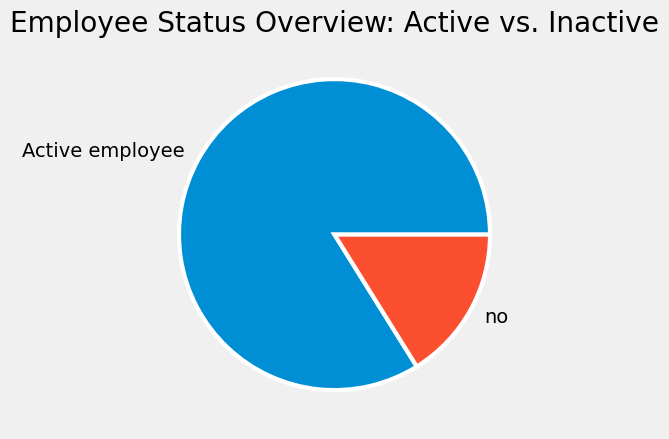

In [22]:
unique_attrition = df_hr['Attrition'].drop_duplicates()

def count_row(row) :
    count = 0 
    # for value in row  :
    if row == 'No' :
        count = 1      
        # else :
        #     count = 0             
    return count
    # return row[row=='No'].count()
    
df_hr['active'] = df_hr['Attrition'].apply(lambda row : count_row(row))

print(f" Number of no {df_hr['active'].sum()}")
active = df_hr['active'].sum()
# print(unique_attrition) 

attrition = pd.DataFrame(unique_attrition)  
attrition['number'] =  [ active ,   num_rows - active ]
display(attrition )
percenk = (active / num_rows) * 100 
# print(f"Employee rate : {percenk.row}")
print(f"Employee rate : \t\t{round(percenk , 2)} ")
# print( active / num_rows))
# print(active.sum())  
# print(active.sum())

plt.pie(attrition['number'], labels=['Active employee' , 'no'], wedgeprops={'edgecolor': 'white','linewidth':3})
plt.title('Employee Status Overview: Active vs. Inactive')



# .

Department  overtime_yes
0         HR            12
1        R&D           197
2      Sales            80

Text(0.5, 1.0, 'Overtime by Department')

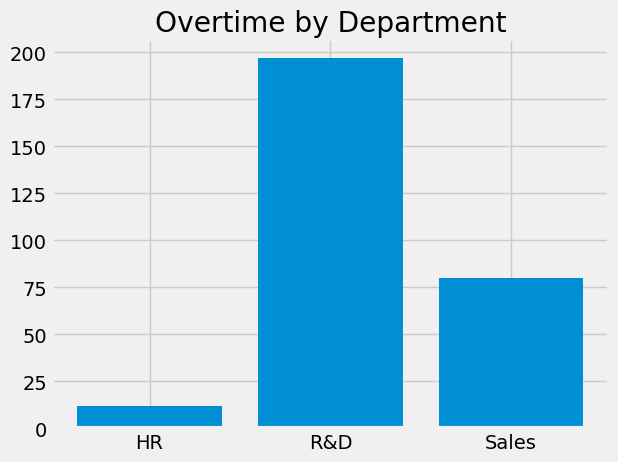

In [25]:
# unq_overtime = df_hr['Over Time'].drop_duplicates()
# unq_department = df_hr['Department'].drop_duplicates()

def count_yess(row) :
    count = 0 
    # for value in row  :
    if row == 'Yes' :
        count = 1      
    return count

df_hr['overtime_yes'] = df_hr['Over Time'].apply( lambda row : count_yess(row))
# df_hr.head()
condition = df_hr['Attrition'] == 'No'
tb_overtime = df_hr[condition].groupby('Department')['overtime_yes'].sum().reset_index()
condition = df_hr['Attrition'] == 'No'
display(tb_overtime)   

plt.style.use('fivethirtyeight')
plt.bar(tb_overtime['Department'] , tb_overtime['overtime_yes'] )   
plt.title('Overtime by Department')
# tb_overtime.loc['Attrition']
# tb_overtime = pd.DataFrame(unq_department , ) # , unq_overtime  ) 

# 

# Active Employee Distribution by Gender and Group Age
- create table for gender with age
- sum all booleas

In [7]:

unq_gender = df_hr['Gender'].drop_duplicates()
print(f"{unq_gender}")

def female(row):
    count = 0 
    if row == 'Female' :
        count = 1
    return count

def male(row) :
    count = 0 
    if row == 'Male' :
        count = 1 
    return count
    
# df_hr['female']
df_hr['female'] = df_hr['Gender'].apply(lambda row : female(row))
df_hr['male'] = df_hr['Gender'].apply(lambda row : male(row))
# df_hr['']

tb_ages = df_hr[condition].groupby('CF_age band')[['female' , 'male']].sum().reset_index()
tb_ages
# plt.plot(df_hr[''])

0    Female
1      Male
Name: Gender, dtype: object


CF_age band  female  male
0     25 - 34     174   268
1     35 - 44     182   272
2     45 - 54     104   116
3     Over 55      22    36
4    Under 25      19    40

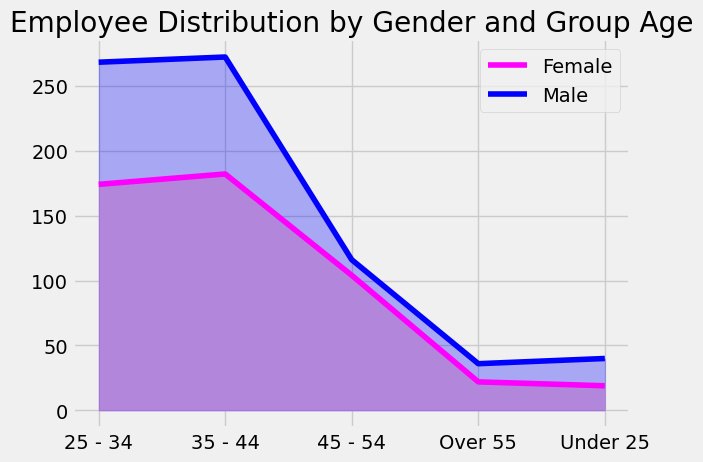

In [8]:
plt.style.use('fivethirtyeight')


plt.plot(tb_ages['CF_age band'] , tb_ages['female'] , color='Magenta' , label='Female')
plt.plot(tb_ages['CF_age band'] , tb_ages['male'] , color='Blue' , label='Male') 
plt.legend() 
plt.title('Employee Distribution by Gender and Group Age')

plt.fill_between( tb_ages['CF_age band'] , tb_ages['female'] , color='pink', alpha=1) 
plt.fill_between( tb_ages['CF_age band'] , tb_ages['male'] , color='blue', alpha=0.3)
plt.show()
# plt.legend(title='inamoe')

Business Travel  Count
0         Non-Travel    138
1  Travel_Frequently    208
2      Travel_Rarely    887

Text(0.5, 1.0, 'Business Travel')

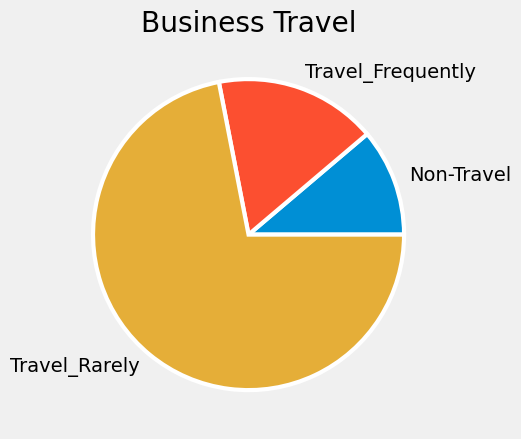

In [27]:
tb_busytravel = df_hr[condition].groupby('Business Travel')['Gender'].count().reset_index()
tb_busytravel = tb_busytravel.rename(columns={'Gender':'Count'})
display(tb_busytravel)  

plt.style.use('fivethirtyeight')
plt.pie(tb_busytravel['Count'] , labels=tb_busytravel['Business Travel'], wedgeprops={'edgecolor': 'white','linewidth':3})
plt.title('Business Travel')
